In [1]:
import os

In [2]:
os.chdir("/Users/ariedamuco/Dropbox (CEU Econ)/ML-for-NLP")

Let's apply what we have seen in theory. First of all, we are going to start creating our corpus of four documents which are actually motivational quotes from a google chrome extension which we are going to find in the inputs folder. They are named Motivational1, Motivational, Motivational3, Motivational4.

In [3]:
os.listdir("Inputs/106-extracted-date")

['106-collins-me.txt',
 '106-torricelli-nj.txt',
 '106-dodd-ct.txt',
 '106-landrieu-la.txt',
 '106-mack-fl.txt',
 '106-moynihan-ny.txt',
 '106-baucus-mt.txt',
 '106-dorgan-nd.txt',
 '106-bryan-nv.txt',
 '106-murkowski-ak.txt',
 '106-coverdell-ga.txt',
 '106-wellstone-mn.txt',
 '106-mikulski-md.txt',
 '106-inouye-hi.txt',
 '106-conrad-nd.txt',
 '106-robb-va.txt',
 '106-gregg-nh.txt',
 '106-reid-nv.txt',
 '106-kyl-az.txt',
 '106-murray-wa.txt',
 '106-snowe-me.txt',
 '106-grassley-ia.txt',
 '106-gramm-tx.txt',
 '106-fitzgerald-il.txt',
 '106-specter-pa.txt',
 '106-voinovich-oh.txt',
 '106-bond-mo.txt',
 '106-lugar-in.txt',
 '106-bunning-ky.txt',
 '106-smith-nh.txt',
 '106-lautenberg-nj.txt',
 '106-cochran-ms.txt',
 '106-chafee2-ri',
 '106-mcconnell-ky.txt',
 '106-craig-id.txt',
 '106-kennedy-ma.txt',
 '106-ashcroft-mo.txt',
 '106-boxer-ca.txt',
 '106-enzi-wy.txt',
 '106-kerrey-ne.txt',
 '106-schumer-ny.txt',
 '106-bayh-in.txt',
 '106-abraham-mi.txt',
 '106-jeffords-vt.txt',
 '106-grams-mn

In [4]:
doc1 = open('Inputs/106-extracted-date/106-mack-fl.txt').read()

In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(doc1)
print(soup.get_text())


106-mack-fl-1-20001031

   Mr. MACK. This language is not intended to affect the public's ability to participate and comment on the development of project implementation reports, project cooperation agreements, operating manuals, and any other documents relating to the development, implementation, and management of individual features of the plan. In addition, this language is not intended to expand any one federal agency's authority. I share your view that the Corps' open process is one of the most important aspects in building the consensus which makes this Comprehensive Everglades Restoration Plan strong. 



106-mack-fl-1-20001027

   Mr. MACK. Madam President, last year the Commerce, Justice, State and Judiciary Appropriations Subcommittee included funding for the Southern Florida Medical Corrections Options Program, which began operations this spring. Working with the Broward County Mental Health Court and the Broward County Sheriff's office it has had tremendous success in trea

In [6]:
doc1 = soup.get_text()

In [7]:
doc1

"\n106-mack-fl-1-20001031\n\n   Mr. MACK. This language is not intended to affect the public's ability to participate and comment on the development of project implementation reports, project cooperation agreements, operating manuals, and any other documents relating to the development, implementation, and management of individual features of the plan. In addition, this language is not intended to expand any one federal agency's authority. I share your view that the Corps' open process is one of the most important aspects in building the consensus which makes this Comprehensive Everglades Restoration Plan strong. \n\n\n\n106-mack-fl-1-20001027\n\n   Mr. MACK. Madam President, last year the Commerce, Justice, State and Judiciary Appropriations Subcommittee included funding for the Southern Florida Medical Corrections Options Program, which began operations this spring. Working with the Broward County Mental Health Court and the Broward County Sheriff's office it has had tremendous succe

In [8]:
doc2 = open('Inputs/106-extracted-date/106-lieberman-ct.txt', encoding='latin-1').read()
doc2 = BeautifulSoup(doc2).get_text()


In [9]:
list_docs = [doc1, doc2]

In [10]:
list_docs

["\n106-mack-fl-1-20001031\n\n   Mr. MACK. This language is not intended to affect the public's ability to participate and comment on the development of project implementation reports, project cooperation agreements, operating manuals, and any other documents relating to the development, implementation, and management of individual features of the plan. In addition, this language is not intended to expand any one federal agency's authority. I share your view that the Corps' open process is one of the most important aspects in building the consensus which makes this Comprehensive Everglades Restoration Plan strong. \n\n\n\n106-mack-fl-1-20001027\n\n   Mr. MACK. Madam President, last year the Commerce, Justice, State and Judiciary Appropriations Subcommittee included funding for the Southern Florida Medical Corrections Options Program, which began operations this spring. Working with the Broward County Mental Health Court and the Broward County Sheriff's office it has had tremendous succ

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vectorizer = CountVectorizer()

In [13]:
vectorizer

CountVectorizer()

In [14]:
doc_vec = vectorizer.fit_transform(list_docs)

In [15]:
doc_vec

<2x12584 sparse matrix of type '<class 'numpy.int64'>'
	with 17645 stored elements in Compressed Sparse Row format>

In [16]:
import pandas as pd
df= pd.DataFrame(doc_vec.toarray().transpose(), index=vectorizer.get_feature_names())

In [17]:
df

,0,1
00,5,1
000,28,79
0015,1,0
004,1,0
10,46,49
...,...,...
zionist,2,0
zone,4,0
zones,1,2
zoroastrian,0,1


In [18]:
df.columns = ["doc1", "doc2"]

In [19]:
df

,doc1,doc2
00,5,1
000,28,79
0015,1,0
004,1,0
10,46,49
...,...,...
zionist,2,0
zone,4,0
zones,1,2
zoroastrian,0,1


In [20]:
#http://www.nltk.org/book/ch01.html
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize

In [21]:
stop_words = stopwords.words('english')

In [22]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def preprocessing_text(text):
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in string.punctuation]
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = LancasterStemmer()
    tokens_lematized = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text 

Let's read the file with motivational content. These are short sentences. The purpose is so  that we can see the Tfidf more clearly.

In [25]:
word_list = []
for line in list_docs:
    word_list.append(preprocessing_text(line))
word_list

["106-mack-fl-1-20001031 mr. mack langu intend affect publ 's abl particip com develop project impl report project coop agr op man docu rel develop impl man individ feat plan addit langu intend expand on fed ag 's auth shar view corp op process on import aspect build consens mak comprehend everglad rest plan strong 106-mack-fl-1-20001027 mr. mack madam presid last year commerc just stat judicy appropry subcommit includ fund southern florid med correct opt program beg op spring work broward county ment heal court broward county sheriff 's off tremend success tre ment il misdem prev recid colleagu hawai shar interest program hawai fac many challeng florid tre ment il misdem 106-mack-fl-2-20001027 mr. mack fisc year 2001 commerc stat just judicy appropry commit report includ numb program commit enco bureau just assist bja examin fund poss edward byrn mem discret grant program hop bja consid fund joint hawaii/florida demonst project develop nat model fut ment heal court 106-mack-fl-3-20001

In [26]:
#vectorizer = TfidfVectorizer(preprocessor = preprocessing_text)

vectorizer = TfidfVectorizer()
# ngram_range=(1,3),stop_words='english'
#vectorizer = TfidfVectorizer(ngram_range=(1,2))

In [27]:
vectorizer

TfidfVectorizer()

In [28]:
doc_vector = vectorizer.fit_transform(word_list)

In [29]:
doc_vector.shape

(2, 7270)

In [30]:
doc_vector

<2x7270 sparse matrix of type '<class 'numpy.float64'>'
	with 10342 stored elements in Compressed Sparse Row format>

In [31]:
doc_vector.toarray()

array([[0.00243995, 0.01366371, 0.00068585, ..., 0.00205756, 0.00243995,
        0.        ],
       [0.00032224, 0.02545696, 0.        , ..., 0.        , 0.00064448,
        0.00090579]])

In [32]:
doc_vector.toarray().transpose()

array([[0.00243995, 0.00032224],
       [0.01366371, 0.02545696],
       [0.00068585, 0.        ],
       ...,
       [0.00205756, 0.        ],
       [0.00243995, 0.00064448],
       [0.        , 0.00090579]])

In [33]:
df = pd.DataFrame(doc_vector.toarray().transpose(), index=vectorizer.get_feature_names())

In [34]:
df

,0,1
00,0.002440,0.000322
000,0.013664,0.025457
0015,0.000686,0.000000
004,0.000686,0.000000
10,0.022448,0.015790
...,...,...
zel,0.000686,0.000000
zero,0.002058,0.000000
zion,0.002058,0.000000
zon,0.002440,0.000644


In [35]:
df.columns = ['doc1', 'doc2']

In [36]:
df

,doc1,doc2
00,0.002440,0.000322
000,0.013664,0.025457
0015,0.000686,0.000000
004,0.000686,0.000000
10,0.022448,0.015790
...,...,...
zel,0.000686,0.000000
zero,0.002058,0.000000
zion,0.002058,0.000000
zon,0.002440,0.000644


In [37]:
freq = df.iloc[:,0].sort_values(ascending=False, inplace=False)

In [38]:
type(freq)

pandas.core.series.Series

In [39]:
freq = freq.head(70)

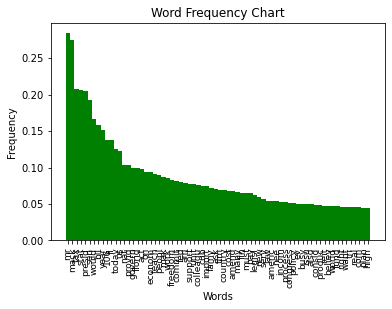

In [40]:
words = freq.index
xvalues = np.arange(len(freq.index))
width = 1.0
ax = plt.axes(frameon=True)
ax.set_xticks(xvalues)
ax.set_xticklabels(words, rotation='vertical', fontsize=9)
ax.set_title('Word Frequency Chart')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
plt.bar(xvalues,freq, width,color='g' )
plt.show()